<a href="https://colab.research.google.com/github/Vinaypatil-Ev/vinEvPy-GoCoLab/blob/main/Tensorflow/TensorflowPrac13_KerasFunctionalApi_ToyResnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

#a Toy Resnet Model

In [ ]:
inputs = tf.keras.Input((32, 32, 3))
x = tf.keras.layers.Conv2D(32, 3, activation="relu")(inputs)
x = tf.keras.layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = tf.keras.layers.MaxPooling2D(3)(x)

x = tf.keras.layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = tf.keras.layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = tf.keras.layers.add([x, block_1_output])

x = tf.keras.layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = tf.keras.layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = tf.keras.layers.add([x, block_2_output])

x = tf.keras.layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(256, activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(10)(x)

model = tf.keras.Model(inputs, outputs)

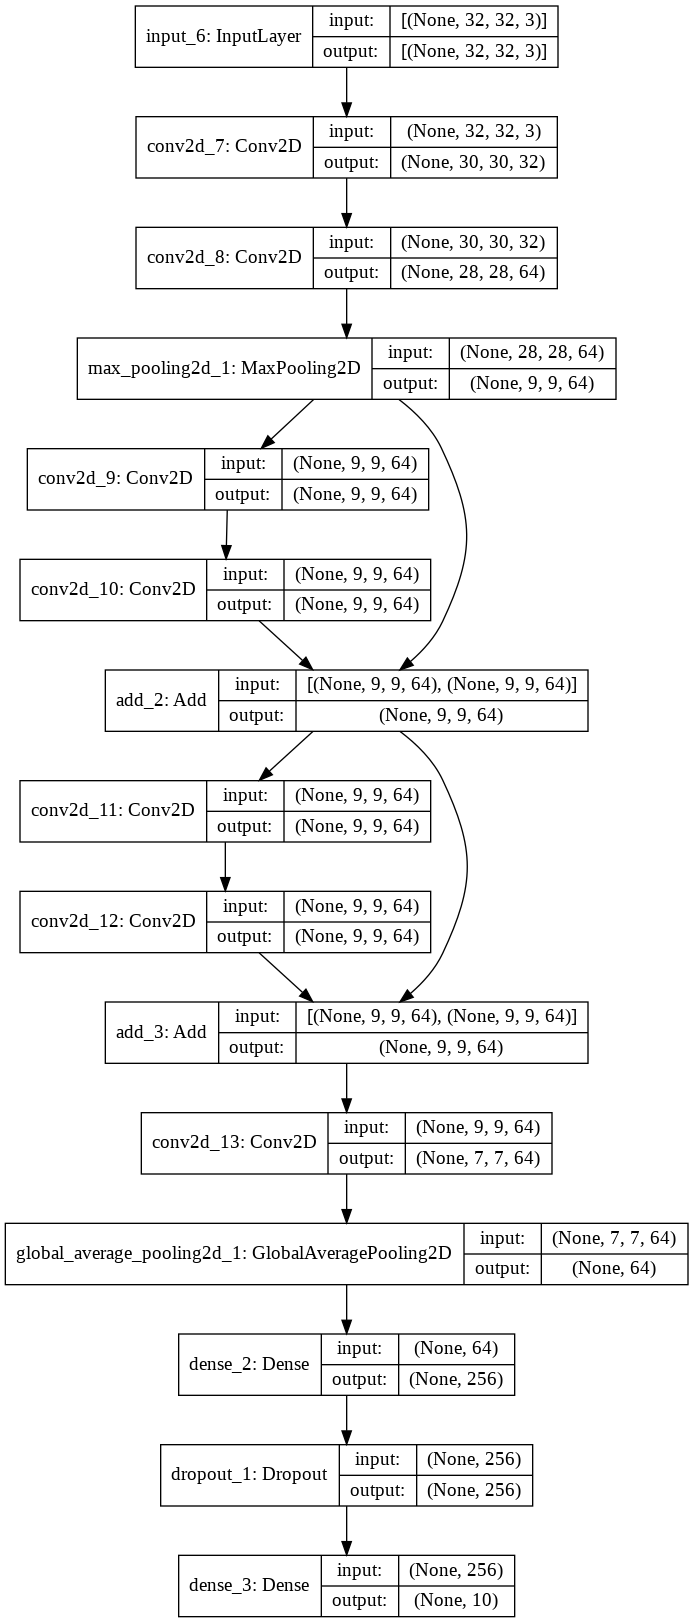

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
(xtrn, ytrn), (xtst, ytst) = tf.keras.datasets.cifar10.load_data()

In [ ]:
xtrn = xtrn.astype("float64") / 255.0
xtst = xtst.astype("float64") / 255.0

ytrn = tf.keras.utils.to_categorical(ytrn, 10)
ytst = tf.keras.utils.to_categorical(xtrn, 10)

In [ ]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.RMSprop(1e-3),
              metrics=["accuracy"])

In [ ]:
xtrn[0].shape

In [ ]:
model.fit(xtrn, ytrn, batch_size=256, epochs=1, validation_split=0.2)

In [ ]:
z = model.predict(xtrn[:1, :])

In [ ]:
dir(model)

In [ ]:
ytrn[0]

In [ ]:
z.argmax()

In [ ]:
dir(z)

#Shared Layers
#### shared layers are layer instances that are used mutiple times in model
#### shared layers are often used to encode inputs from similar spaces(say two different pieace of text that feature similar vocabulary. This allows to sharing of information across different inputs and they make it possible train such model on less data 

In [ ]:
emb = tf.keras.layers.Embedding(1000, 128)
i1 = tf.keras.Input((None, ), dtype="int32")
i2 = tf.keras.Input((None, ), dtype="int32")
o1 = emb(i1)
o2 = emb(i2)

## Extract and reuse nodes of graph of layers

In [ ]:
vgg19 = tf.keras.applications.VGG19()
feature_list = [l.output for l in vgg19.layers]
feature_extraction_model = tf.keras.Model(vgg19.inputs, feature_list)

In [ ]:
feature_list

In [ ]:
import numpy as np

In [ ]:
img = np.random.random((1, 224, 224, 3)).astype("float32")
feature_extraction_model(img)

# Extend Api using custom layer

In [ ]:
class CustomLayer(tf.keras.layers.Layer):
  def __init__(self, units):
    super(CustomLayer, self).__init__()
    self.units = units
  
  def build(self, input_shape):
    self.w = self.add_weight(
        
        shape=(input_shape[-1], self.units),
        initializer="random_normal",
        trainable=True
    )
    self.b = self.add_weight(
        shape=(self.units,),
        initializer="random_normal",
        trainable=True
    )
  
  def call(self, inputs):
    return tf.matmul(inputs, self.w) + self.b

  def get_config():
    return {"Units": self.units}

In [ ]:
ie = tf.keras.Input((4))
oe = CustomLayer(8)(ie)

In [ ]:
model = tf.keras.Model(ie, oe)